In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r'C:\Users\German\Desktop\application_record.csv')

In [4]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
#scatter plot
#Воссоздайте точечную диаграмму.
#Диаграмма рассеяния пытается показать взаимосвязь между количеством рабочих дней 
#и возрастом человека (DAYS_BIRTH) для людей, которые не были безработными. 
#Обратите внимание: чтобы воспроизвести эту диаграмму, вы должны сначала удалить безработных 
#из набора данных. Также обратите внимание на знак оси, они оба преобразуются в положительные. 
#Наконец, не стесняйтесь настраивать параметры альфы и ширины линии на диаграмме рассеяния, 
#так как очень много точек накладываются друг на друга.
employed=df[df['DAYS_EMPLOYED']<0]

In [6]:
employed['DAYS_EMPLOYED']=employed['DAYS_EMPLOYED']*-1

C:\Users\German\AppData\Local\Temp/ipykernel_3956/2875911563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employed['DAYS_EMPLOYED']=employed['DAYS_EMPLOYED']*-1


In [7]:
employed['DAYS_EMPLOYED']

0         4542
1         4542
2         1134
3         3051
4         3051
          ... 
438547    2704
438548    2095
438553    3007
438554     372
438556    1201
Name: DAYS_EMPLOYED, Length: 363228, dtype: int64

In [8]:
employed['DAYS_BIRTH']=employed['DAYS_BIRTH']*-1

C:\Users\German\AppData\Local\Temp/ipykernel_3956/4195717620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employed['DAYS_BIRTH']=employed['DAYS_BIRTH']*-1


In [11]:
employed[['DAYS_BIRTH','DAYS_EMPLOYED']]

,DAYS_BIRTH,DAYS_EMPLOYED
0,12005,4542
1,12005,4542
2,21474,1134
3,19110,3051
4,19110,3051
...,...,...
438547,10966,2704
438548,12569,2095
438553,15939,3007
438554,8169,372


<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='DAYS_EMPLOYED'>

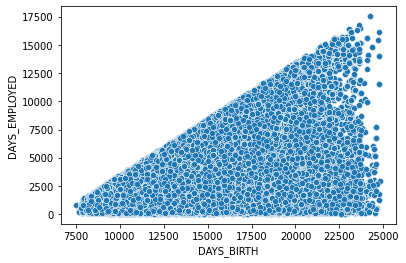

In [12]:
sns.scatterplot(data=employed,y="DAYS_EMPLOYED",x="DAYS_BIRTH")

<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='DAYS_EMPLOYED'>

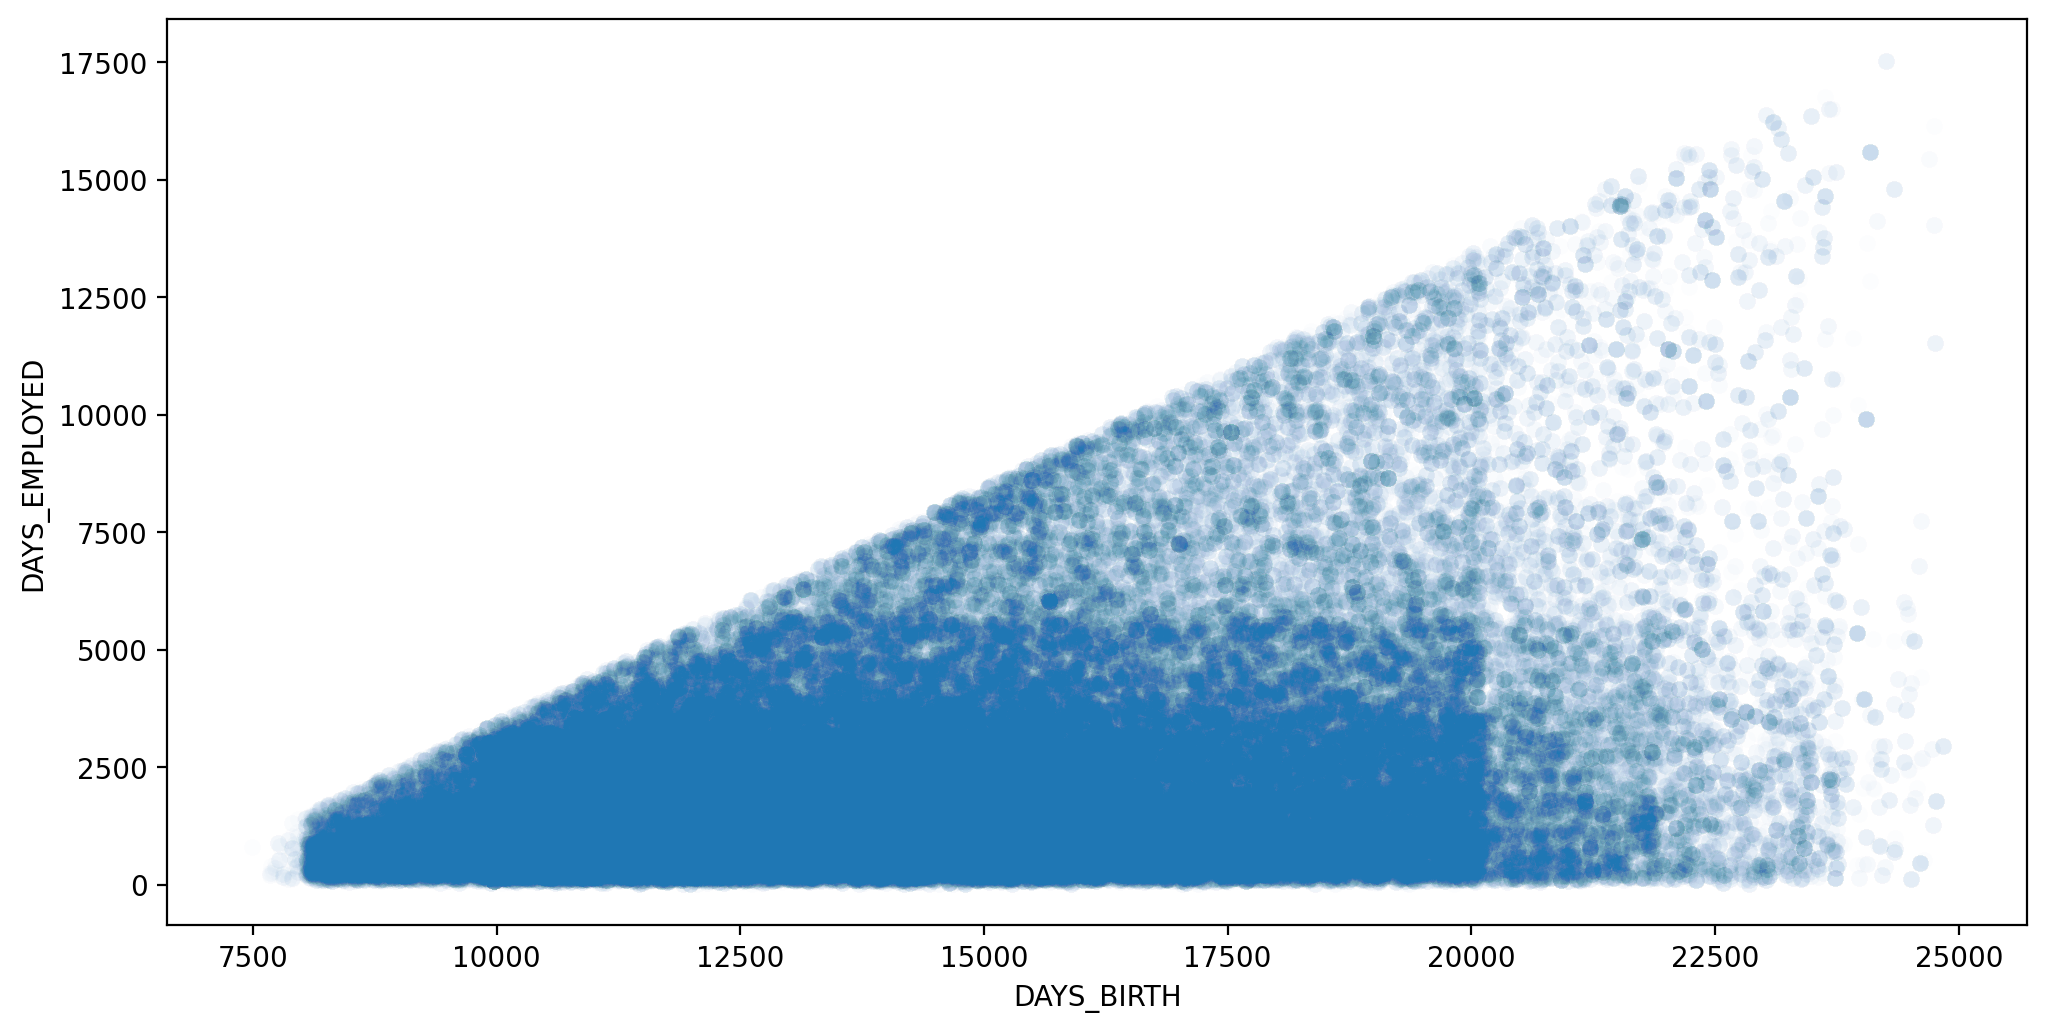

In [14]:
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(data=employed,y="DAYS_EMPLOYED",x="DAYS_BIRTH",alpha=0.01,linewidth=0)

In [15]:
len(employed)

363228

<AxesSubplot:xlabel='YEARS', ylabel='Count'>

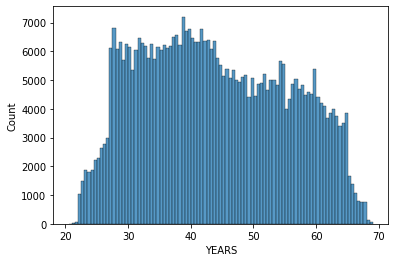

In [17]:
#histplot
#ЗАДАЧА: Воссоздайте график распределения:

#Обратите внимание, вам нужно будет выяснить, как рассчитать «Возраст в годах» из одного из 
#столбцов в DF. Хорошо подумайте об этом. Не беспокойтесь слишком сильно, если вы не можете 
#точно воспроизвести стиль.
df['YEARS']=-1*df['DAYS_BIRTH']/365
sns.histplot(data=df,x='YEARS')

<AxesSubplot:xlabel='YEARS', ylabel='Count'>

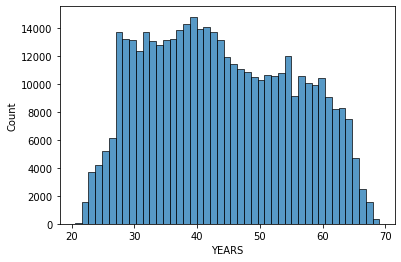

In [18]:
df['YEARS']=-1*df['DAYS_BIRTH']/365
sns.histplot(data=df,x='YEARS',bins=45)

<AxesSubplot:xlabel='YEARS', ylabel='Count'>

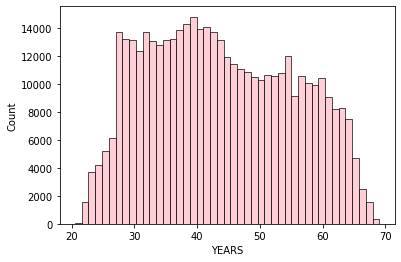

In [19]:
df['YEARS']=-1*df['DAYS_BIRTH']/365
sns.histplot(data=df,x='YEARS',bins=45,color='pink')

In [24]:
#box plot
#ЗАДАНИЕ: Воссоздайте категориальный график:

#Этот график показывает информацию только для нижней половины получателей дохода в наборе данных. 
#Он показывает диаграммы для каждой категории столбца NAME_FAMILY_STATUS для отображения 
#распределения их общего дохода. Оттенок — это столбец «FLAG_OWN_REALTY». 
#Примечание. Вам нужно будет настроить или взять только часть фрейма данных перед 
#воссозданием этого графика.
int(len(df))/2

219278.5

In [25]:
bottom_half_income=df.nsmallest(n=219278,columns='AMT_INCOME_TOTAL')

<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='AMT_INCOME_TOTAL'>

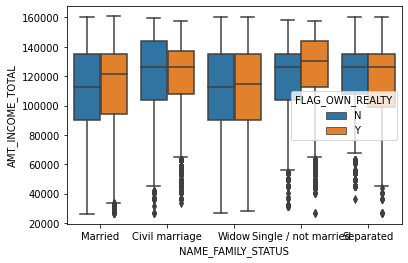

In [26]:
sns.boxplot(data=bottom_half_income,y='AMT_INCOME_TOTAL',x='NAME_FAMILY_STATUS',
            hue='FLAG_OWN_REALTY')

<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='AMT_INCOME_TOTAL'>

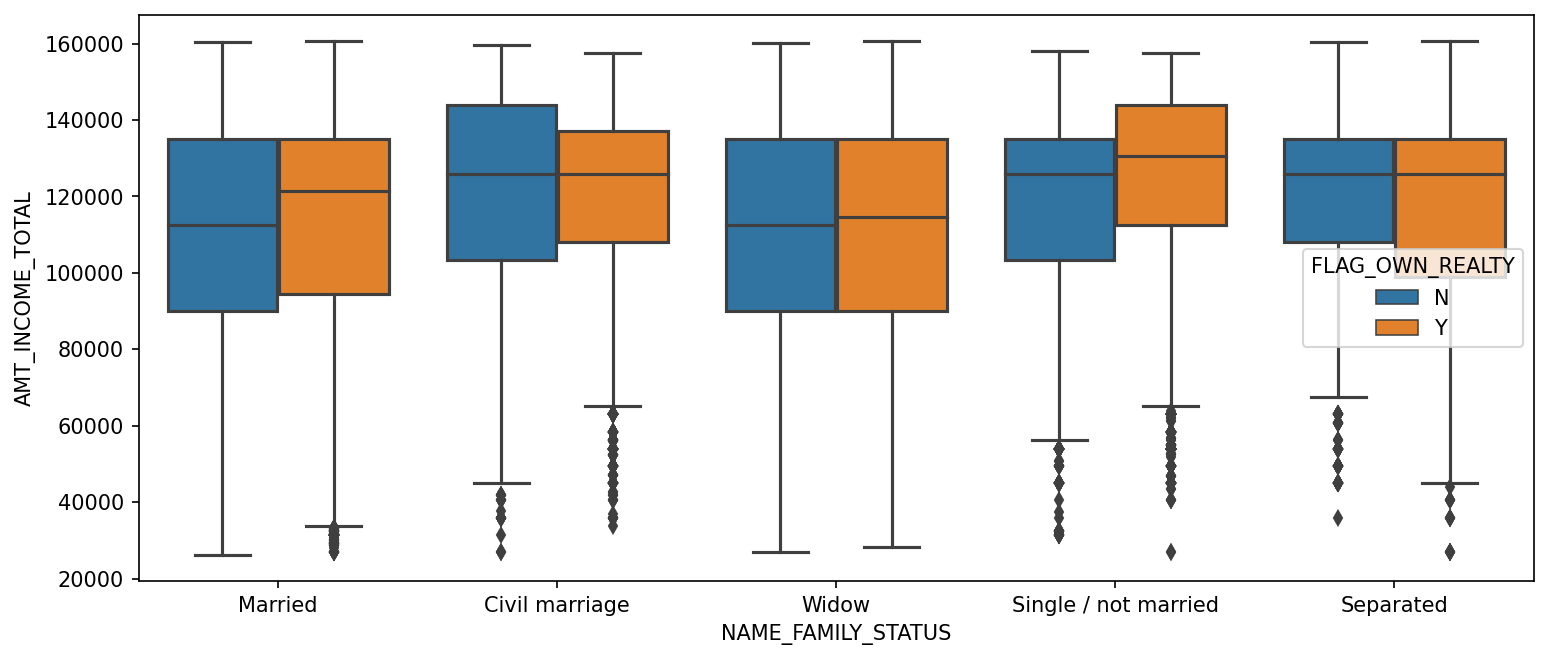

In [27]:
plt.figure(figsize=(12,5),dpi=150)
sns.boxplot(data=bottom_half_income,y='AMT_INCOME_TOTAL',x='NAME_FAMILY_STATUS',
            hue='FLAG_OWN_REALTY')

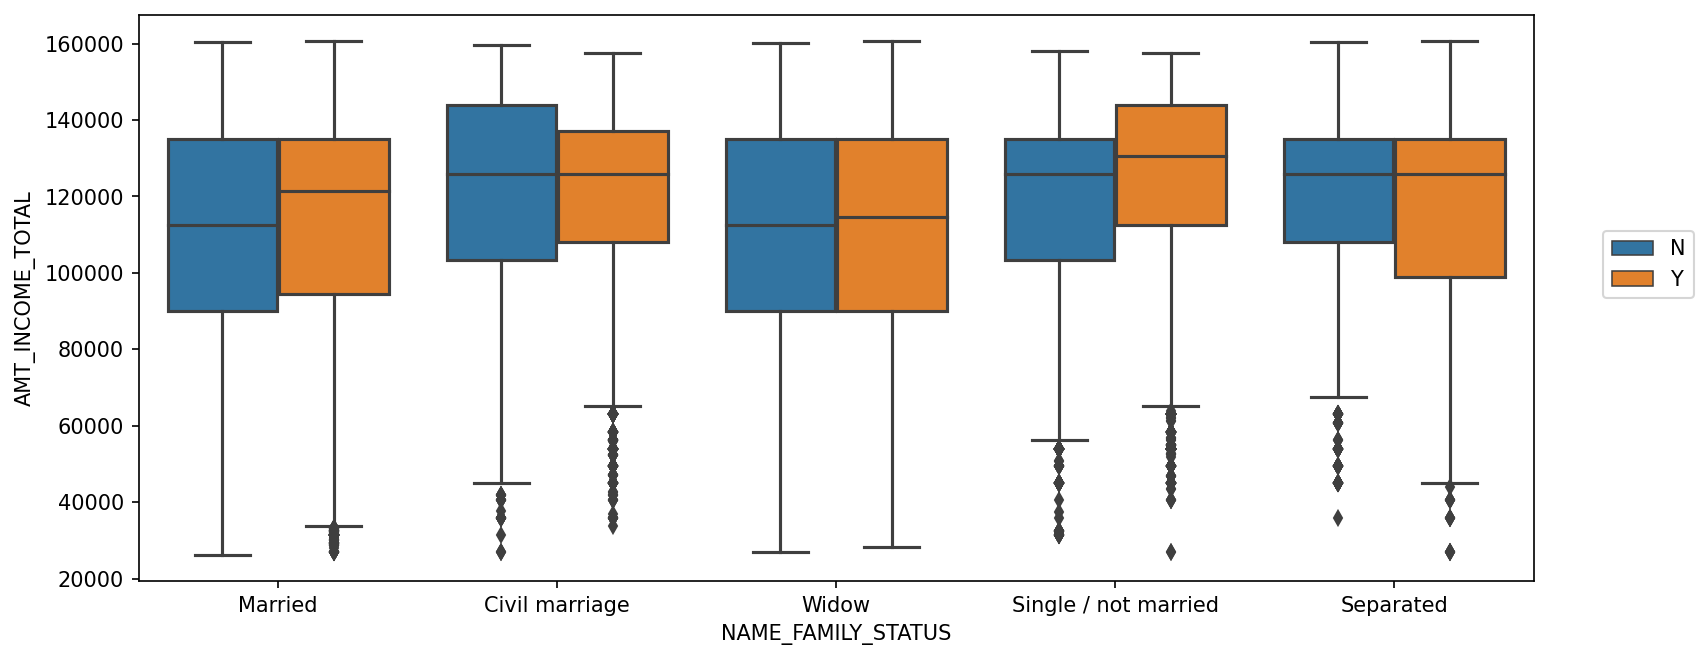

In [28]:
plt.figure(figsize=(12,5),dpi=150)
sns.boxplot(data=bottom_half_income,y='AMT_INCOME_TOTAL',x='NAME_FAMILY_STATUS',
            hue='FLAG_OWN_REALTY')
plt.legend(loc=(1.05,0.5))

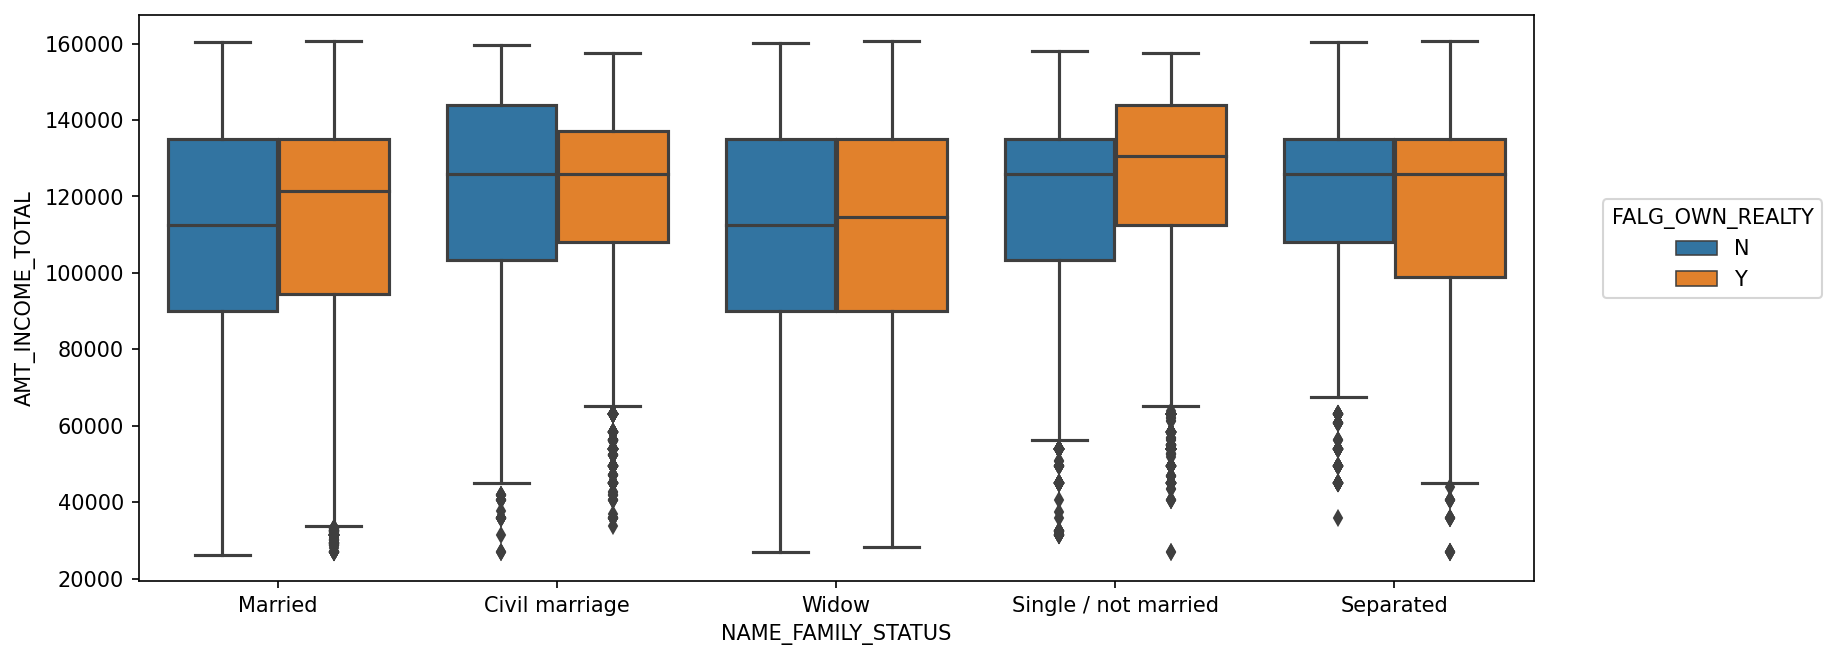

In [29]:
plt.figure(figsize=(12,5),dpi=150)
sns.boxplot(data=bottom_half_income,y='AMT_INCOME_TOTAL',x='NAME_FAMILY_STATUS',
            hue='FLAG_OWN_REALTY')
plt.legend(loc=(1.05,0.5),title='FALG_OWN_REALTY')

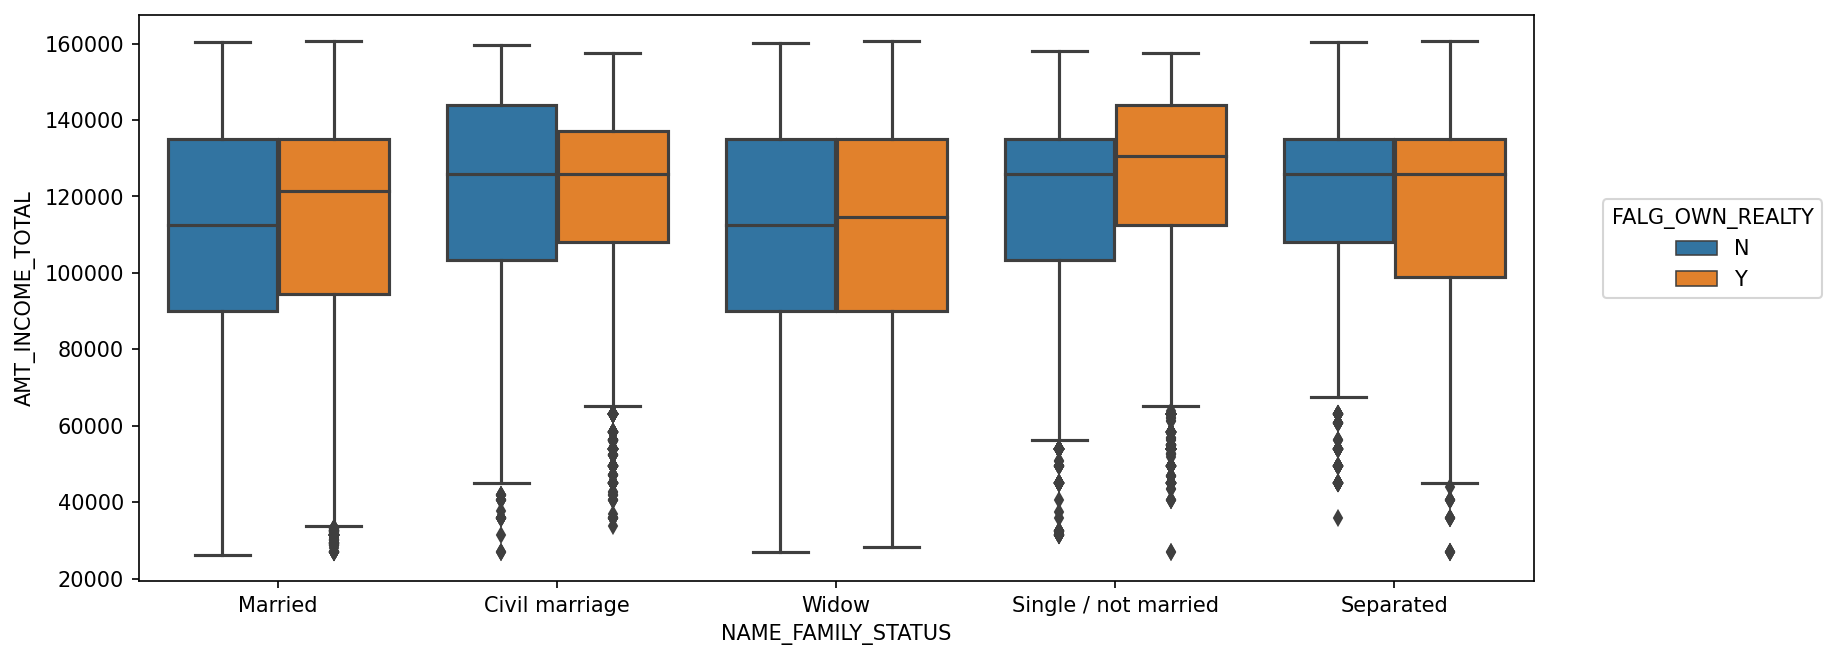

In [30]:
plt.figure(figsize=(12,5),dpi=150)
sns.boxplot(data=bottom_half_income,y='AMT_INCOME_TOTAL',x='NAME_FAMILY_STATUS',
            hue='FLAG_OWN_REALTY')
plt.legend(loc=(1.05,0.5),title='FALG_OWN_REALTY')

In [31]:
#heatmap
#ЗАДАНИЕ: Воссоздайте тепловую карту:

#Эта тепловая карта показывает корреляцию между столбцами в кадре данных. 
#Вы можете получить корреляцию с помощью .corr() , также обратите внимание, 
#что столбец FLAG_MOBIL имеет корреляцию NaN с каждым другим столбцом, поэтому вы должны 
#удалить его перед вызовом .corr().

In [32]:
df.corr()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,YEARS
ID,1.000000,-0.005178,0.011179,-0.004994,-0.002467,NaN,-0.023319,-0.018992,0.032875,-0.001862,0.004994
CNT_CHILDREN,-0.005178,1.000000,0.019177,0.349088,-0.241535,NaN,0.038418,-0.038266,0.028457,0.884781,-0.349088
AMT_INCOME_TOTAL,0.011179,0.019177,1.000000,0.053775,-0.141291,NaN,-0.033635,0.004444,0.112139,0.011454,-0.053775
DAYS_BIRTH,-0.004994,0.349088,0.053775,1.000000,-0.617908,NaN,0.171829,-0.037984,0.096752,0.306179,-1.000000
DAYS_EMPLOYED,-0.002467,-0.241535,-0.141291,-0.617908,1.000000,NaN,-0.232208,0.004868,-0.074372,-0.234373,0.617908
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,-0.023319,0.038418,-0.033635,0.171829,-0.232208,NaN,1.000000,0.290066,-0.060915,0.049777,-0.171829
FLAG_PHONE,-0.018992,-0.038266,0.004444,-0.037984,0.004868,NaN,0.290066,1.000000,-0.001170,-0.024213,0.037984
FLAG_EMAIL,0.032875,0.028457,0.112139,0.096752,-0.074372,NaN,-0.060915,-0.001170,1.000000,0.022054,-0.096752
CNT_FAM_MEMBERS,-0.001862,0.884781,0.011454,0.306179,-0.234373,NaN,0.049777,-0.024213,0.022054,1.000000,-0.306179


In [33]:
df.drop('FLAG_MOBIL',axis=1).corr()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,YEARS
ID,1.000000,-0.005178,0.011179,-0.004994,-0.002467,-0.023319,-0.018992,0.032875,-0.001862,0.004994
CNT_CHILDREN,-0.005178,1.000000,0.019177,0.349088,-0.241535,0.038418,-0.038266,0.028457,0.884781,-0.349088
AMT_INCOME_TOTAL,0.011179,0.019177,1.000000,0.053775,-0.141291,-0.033635,0.004444,0.112139,0.011454,-0.053775
DAYS_BIRTH,-0.004994,0.349088,0.053775,1.000000,-0.617908,0.171829,-0.037984,0.096752,0.306179,-1.000000
DAYS_EMPLOYED,-0.002467,-0.241535,-0.141291,-0.617908,1.000000,-0.232208,0.004868,-0.074372,-0.234373,0.617908
FLAG_WORK_PHONE,-0.023319,0.038418,-0.033635,0.171829,-0.232208,1.000000,0.290066,-0.060915,0.049777,-0.171829
FLAG_PHONE,-0.018992,-0.038266,0.004444,-0.037984,0.004868,0.290066,1.000000,-0.001170,-0.024213,0.037984
FLAG_EMAIL,0.032875,0.028457,0.112139,0.096752,-0.074372,-0.060915,-0.001170,1.000000,0.022054,-0.096752
CNT_FAM_MEMBERS,-0.001862,0.884781,0.011454,0.306179,-0.234373,0.049777,-0.024213,0.022054,1.000000,-0.306179
YEARS,0.004994,-0.349088,-0.053775,-1.000000,0.617908,-0.171829,0.037984,-0.096752,-0.306179,1.000000


<AxesSubplot:>

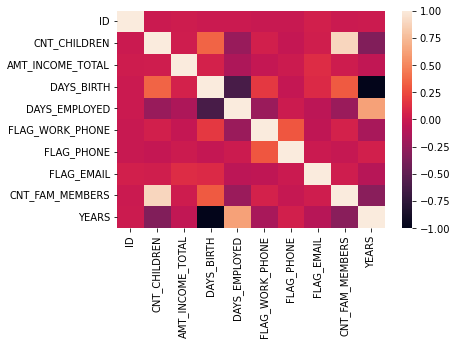

In [34]:
sns.heatmap(df.drop('FLAG_MOBIL',axis=1).corr())

<AxesSubplot:>

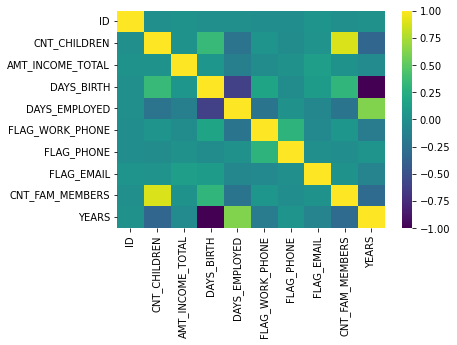

In [35]:
sns.heatmap(df.drop('FLAG_MOBIL',axis=1).corr(),cmap='viridis')

<AxesSubplot:>

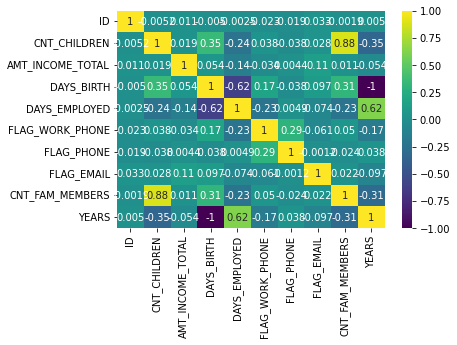

In [36]:
sns.heatmap(df.drop('FLAG_MOBIL',axis=1).corr(),cmap='viridis',annot=True)